In [1]:
import os

# Technials Analysis Library
os.chdir("../technicals")
import technicals

# Market Data Connection
os.chdir("../marketdata")
import alpaca

# Machine Learning Model
os.chdir("../ml")
import lstm_model

In [2]:
# Set market data date range 
from datetime import date, datetime, timedelta

end_date  = datetime.now()
start_date  = (end_date - timedelta(days=1000))

start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')

print(f"Start date : {start_date}")
print(f"End date : {end_date}")

Start date : 2018-10-16
End date : 2021-07-12


In [3]:
# Load the dataset
test_tickers = ["ADSK"]
ohlcv_df = alpaca.ohlcv(test_tickers, start_date=start_date, end_date=end_date)
tech_ind = technicals.TechnicalAnalysis(ohlcv_df)

df = tech_ind.get_all_technicals(test_tickers[0])
df.head()

,open,high,low,close,volume,rsi,williams,mfi,stoch_k,macd,...,ma_50,ma_200,ema_7,ema_14,ema_21,highlow,closeopen,bb_high,bb_low,pvt
time,,,,,,,,,,,,,,,,,,,,,
2018-10-16 00:00:00-04:00,137.7500,141.80,136.6200,141.42,2011114,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,141.420000,141.420000,141.420000,5.1800,3.6700,0.0,0.0,0.000000
2018-10-17 00:00:00-04:00,141.1800,142.10,138.7000,141.82,1295773,100.000000,0.0,0.0,0.0,0.008974,...,0.0,0.0,141.648571,141.634286,141.629524,3.4000,0.6400,0.0,0.0,0.000000
2018-10-18 00:00:00-04:00,140.7600,141.45,135.7600,137.28,1793153,55.226824,0.0,0.0,0.0,-0.129350,...,0.0,0.0,139.759459,139.970934,140.039517,5.6900,-3.4800,0.0,0.0,-61068.183852
2018-10-19 00:00:00-04:00,138.8099,140.43,133.1001,133.18,2883838,38.533373,0.0,0.0,0.0,-0.337122,...,0.0,0.0,137.353257,137.893396,138.072265,7.3299,-5.6299,0.0,0.0,-28725.462394
2018-10-22 00:00:00-04:00,133.9300,137.31,131.4500,135.64,1575925,48.534072,0.0,0.0,0.0,-0.345035,...,0.0,0.0,136.791677,137.305488,137.488969,5.8600,1.7100,0.0,0.0,115237.903532


In [4]:
# Reload Machine Leaning Library for testing purposes
import importlib
os.chdir("../ml")
importlib.reload(lstm_model)

<module 'lstm_model' from 'G:\\My Drive\\dev\\cu_proj_2\\code\\ml\\lstm_model.py'>

In [5]:
ml_model = lstm_model.MachineLearningModel(df)

In [6]:
hist = ml_model.build_model(summary=1, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 90)           40320     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 30)           14520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 14)                434       
Total params: 62,594
Trainable params: 62,594
Non-trainable params: 0
_________________________________________________________________


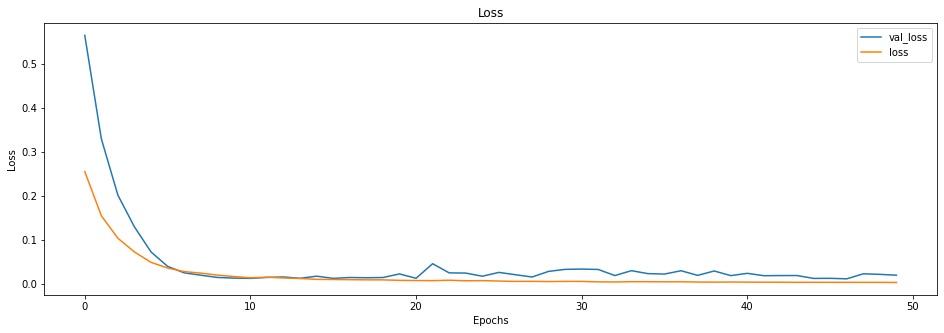

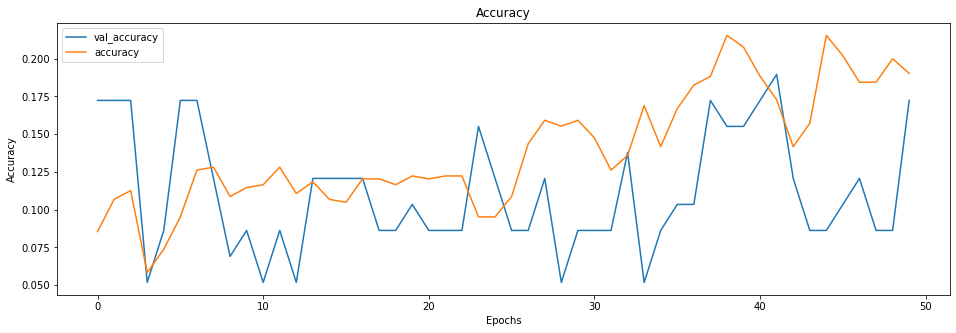

In [7]:
ml_model.visualize_training_results(hist=hist)

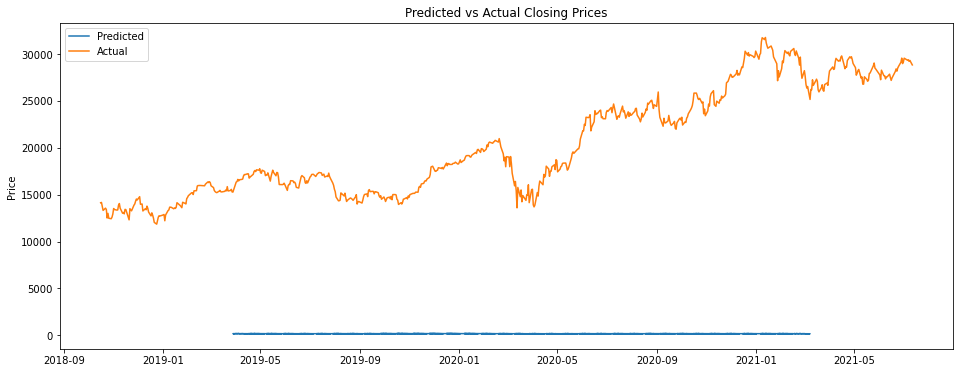

In [8]:
ml_model.visualize_training_price()

In [9]:
ml_model.save_model('test')